In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# seeting up notebook display options and wornings

pd.set_option('display.max_columns', None)
import warnings

In [19]:
# Getting data from google spreadsheets

sheet_id = "1ecopK6oyyb4d_7-QLrCr8YlgFrCetHU7-VQfnYej7JY"
sheet_url = url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx"

excel_file = pd.ExcelFile(sheet_url)
sheets = excel_file.sheet_names

In [20]:
# Combine all sheets into a single DataFrame

table_lst = []

for sheet in sheets:
    df = pd.read_excel(excel_file, sheet_name=sheet)

    # spliting sheet name into city and weekday
    city, day = sheet.split("_")

    df['city'] = city
    df['day'] = day

    table_lst.append(df)

final_df = pd.concat(table_lst, ignore_index=True)

final_df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


In [21]:
# adding country column

countries = {
    "amsterdam": "Netherlands",
    "athens": "Greece",
    'berlin': "Germany",
    "barcelona": "Spain",
    "paris": "France",
    "rome": "Italy",
    "lisbon": "Portugal",
    "london":"United Kingdom",
    "vienna": "Austria"
}

final_df['country'] = final_df['city'].map(countries)

final_df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [22]:
# renaming the realSum colum to price

final_df = final_df.rename(columns = {'realSum':"price"})

final_df.head()

,Unnamed: 0,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
0,0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [23]:
# removing the first unnamed column

final_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [25]:
final_df.multi.value_counts()

multi
0    36642
1    15065
Name: count, dtype: int64

In [29]:
# displaying frist 7 rows

final_df.head(7)

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands
5,552.808567,Private room,False,True,3,False,0,0,8,100,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376,4.87699,52.38966,amsterdam,weekdays,Netherlands
6,215.124317,Private room,False,True,2,False,0,0,10,94,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251,4.91570,52.38296,amsterdam,weekdays,Netherlands


In [30]:
# displaying last 7 rows
final_df.tail(7)

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
51700,115.933899,Private room,False,True,4,False,1,0,9,94,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797,16.33970,48.19325,vienna,weekends,Austria
51701,750.765491,Entire home/apt,False,False,6,False,0,1,10,96,3,0.378804,0.203138,257.494817,18.440080,548.973296,13.268473,16.37825,48.21001,vienna,weekends,Austria
51702,715.938574,Entire home/apt,False,False,6,False,0,1,10,100,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends,Austria
51703,304.793960,Entire home/apt,False,False,2,False,0,0,8,86,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends,Austria
51704,637.168969,Entire home/apt,False,False,2,False,0,0,10,93,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,vienna,weekends,Austria
51705,301.054157,Private room,False,True,2,False,0,0,10,87,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends,Austria
51706,133.230489,Private room,False,True,4,True,1,0,10,93,1,1.263932,0.480903,150.450381,10.774264,225.247293,5.444140,16.39066,48.20811,vienna,weekends,Austria


In [31]:
# displaying random 7 rows

final_df.sample(7)

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
37990,171.031783,Entire home/apt,False,False,2,False,0,0,9,93,0,3.927141,0.256293,172.062128,8.366533,427.941731,19.741950,2.40486,48.84849,paris,weekends,France
39860,201.762794,Entire home/apt,False,False,4,True,0,0,10,98,1,3.540028,0.303022,326.209878,7.228875,983.700283,21.417924,12.47949,41.87392,rome,weekdays,Italy
37298,155.885917,Entire home/apt,False,False,2,False,0,1,9,88,0,2.081840,0.179207,293.082299,14.251148,781.811057,36.066767,2.37023,48.87132,paris,weekends,France
51600,404.599958,Entire home/apt,False,False,2,False,0,1,10,100,1,1.262089,0.332102,218.212459,15.626937,341.309306,8.249314,16.36616,48.19834,vienna,weekends,Austria
29700,334.909099,Entire home/apt,False,False,4,True,0,1,10,94,2,7.650502,0.531818,161.573200,11.231583,336.672250,6.025847,-0.02403,51.53198,london,weekends,United Kingdom
24026,661.351396,Entire home/apt,False,False,4,False,1,0,10,100,1,2.409150,0.086291,547.371184,38.048378,1115.711246,19.977741,-0.09360,51.51291,london,weekdays,United Kingdom
30593,556.221924,Private room,False,True,4,False,1,0,10,90,2,3.665389,0.339042,315.911150,21.960216,743.445856,13.306385,-0.08615,51.52880,london,weekends,United Kingdom


In [33]:
#checking the datatypes of the dataset
final_df.dtypes

price                         float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
day                            object
country                        object
dtype: object

In [34]:
# summary statistics of numerical columns

final_df.describe()

,price,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


In [35]:
# summary statistis of categorical columns

final_df.describe(include = 'object')

,room_type,city,day,country
count,51707,51707,51707,47685
unique,3,10,2,9
top,Entire home/apt,london,weekends,United Kingdom
freq,32648,9993,26207,9993


## Exploratory Data Analysis

In [41]:
# finding listings in each city in total also per type of day

final_df.groupby(['city', 'day']).size()

city       day     
amsterdam  weekdays    1103
           weekends     977
athens     weekdays    2653
           weekends    2627
barcelona  weekdays    1555
           weekends    1278
berlin     weekdays    1284
           weekends    1200
budapest   weekdays    2074
           weekends    1948
lisbon     weekdays    2857
           weekends    2906
london     weekdays    4614
           weekends    5379
paris      weekdays    3130
           weekends    3558
rome       weekdays    4492
           weekends    4535
vienna     weekdays    1738
           weekends    1799
dtype: int64

In [42]:
final_df.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,day,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays,Netherlands


In [55]:
# Which city has the biggest proportion of superhosts?

# final_df[final_df['host_is_superhost'] == True].groupby('city').size().sort_values(ascending=False)

final_df.groupby('city')['host_is_superhost'].mean().sort_values(ascending=False)  

city
athens       0.428598
budapest     0.378916
rome         0.326687
vienna       0.284139
amsterdam    0.284135
berlin       0.257246
lisbon       0.213951
barcelona    0.181433
london       0.157410
paris        0.140700
Name: host_is_superhost, dtype: float64

In [57]:
# Which cities have listings with more than four rooms?

final_df[final_df['bedrooms']>4]['city'].unique()

array(['amsterdam', 'berlin', 'barcelona', 'lisbon', 'london', 'paris',
       'rome'], dtype=object)

In [62]:
# Which city has the most entire home/apt type listings?

final_df[final_df['room_type'] == 'Entire home/apt'].groupby('city').size().sort_values(ascending=False)[:1]

city
rome    5561
dtype: int64

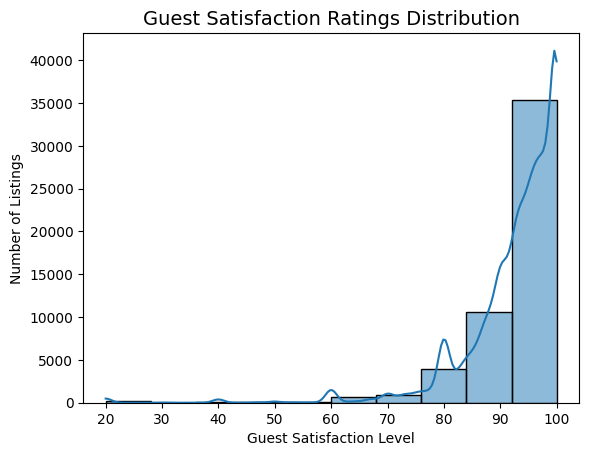

In [65]:
# Are ratings typically high across listings, or is there a wide variation? 
# Plot the distribution of guest_satisfaction_overall ratings.  

sns.histplot(final_df['guest_satisfaction_overall'], bins=10, kde=True)

plt.title("Guest Satisfaction Ratings Distribution", fontsize=14)
plt.xlabel("Guest Satisfaction Level")
plt.ylabel("Number of Listings")
plt.show()

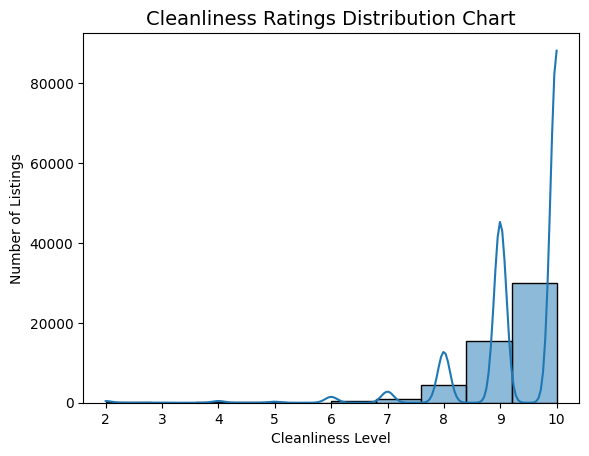

In [66]:
# Are ratings typically high across listings, or is there a wide variation? 
# b.Examine the distribution of cleanliness_rating.

sns.histplot(final_df['cleanliness_rating'], bins=10, kde=True)

plt.title("Cleanliness Ratings Distribution Chart", fontsize=14)
plt.xlabel("Cleanliness Level")
plt.ylabel("Number of Listings")
plt.show()

<Axes: xlabel='person_capacity', ylabel='Count'>

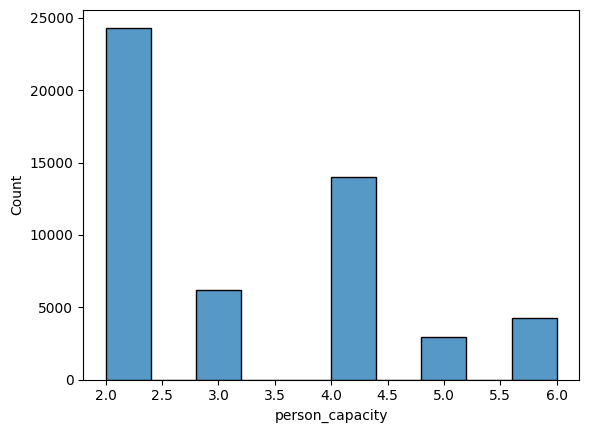

In [71]:
# 6. How does person_capacity vary across listings? What is the most common capacity of listings?

sns.histplot(final_df['person_capacity'], bins=10, kde=False)

2 is the most common capacity in the listing

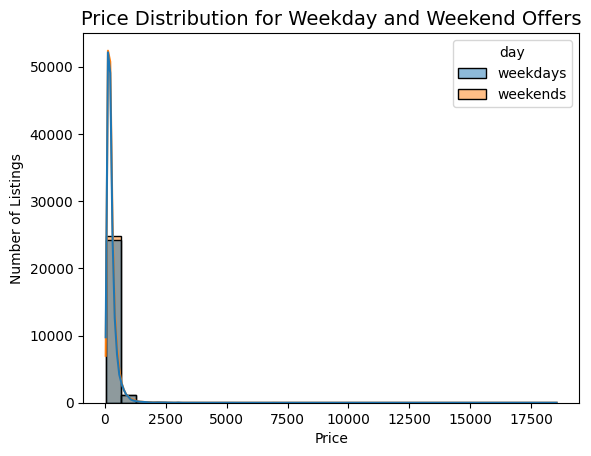

Skewness of price distribution: 21.41995656335094


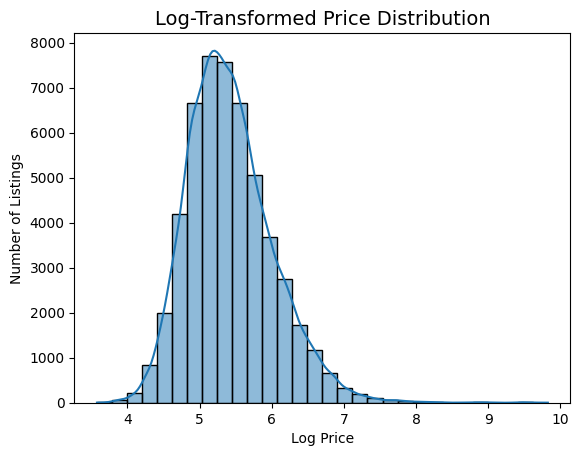

Skewness of log-transformed price distribution: 0.71723032634003


In [ ]:
# 7.	Plot the distribution of price (former realSum) for both weekday and weekend offers
# a.	check normality, skewness, modality
# b.	If skewed, consider using transformations (e.g. log); can you normalize it?

sns.histplot(final_df, x='price', hue='day', bins=30, kde=True)
plt.title("Price Distribution for Weekday and Weekend Offers", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

# checking skewness
skewness = final_df['price'].skew()
print(f"Skewness of price distribution: {skewness}")

# applying log transformation if skewed
if skewness > 1 or skewness < -1:
    final_df['log_price'] = np.log(final_df['price'] + 1)  # Adding 1 to avoid log(0)
    sns.histplot(final_df['log_price'], bins=30, kde=True)
    plt.title("Log-Transformed Price Distribution", fontsize=14)
    plt.xlabel("Log Price")
    plt.ylabel("Number of Listings")
    plt.show()
    log_skewness = final_df['log_price'].skew()
    print(f"Skewness of log-transformed price distribution: {log_skewness}")


In [78]:
# 8. Is there a difference in price per night between two cities? Choose at least three pairs of cities during weekdays.
city_pairs = [("amsterdam", "berlin"), ("paris", "rome"), ("london", "vienna")]
for city1, city2 in city_pairs:
    print(f"\nPrice comparison between {city1} and {city2} on weekdays:")
    
    


Price comparison between amsterdam and berlin on weekdays:

Price comparison between paris and rome on weekdays:

Price comparison between london and vienna on weekdays:
